### **Volatility Forecast Bank of America**


#### **Library**

In [41]:
%load_ext autoreload
%load_ext sql
%autoreload 2

import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from config import settings
from data import SQLRepository

from data import AlphaVantageAPI

import os
from pydantic_settings import BaseSettings


from statsmodels.graphics.tsaplots import plot_acf

from model import GarchModel


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The sql extension is already loaded. To reload it, use:
  %reload_ext sql


#### **Database (SQLite3) Connection**

In [2]:
connection = sqlite3.connect(database=settings.db_name,check_same_thread=False)

print("connection type:", type(connection))

# Create instance of `AlphaVantageAPI` class
av = AlphaVantageAPI()
print("av type:", type(av))

connection type: <class 'sqlite3.Connection'>
av type: <class 'data.AlphaVantageAPI'>


##### **Repository Class Instance**

In [3]:
# Create instance of class
repo = SQLRepository(connection=connection)

# Does `repo` have a "connection" attribute?

assert hasattr(repo,"connection")
# Is the "connection" attribute a SQLite `Connection`?
assert isinstance(repo.connection, sqlite3.Connection)

#### **Financials Sector-Bank of America (BAC)**

##### **Insert Data in to BAC database**

In [4]:
# Define the ticker for Bank of America
ticker = "BAC"

# Get Bank of America data using `av` (Alpha Vantage)
boa_records = av.get_daily(ticker=ticker)

# Insert `boa_records` into the database using `repo`
response = repo.insert_table(
    table_name=ticker,
    records=boa_records,
    if_exists="replace"
)

response

{'transaction_successful': True, 'records_inserted': 6546}

In [5]:
ticker = "BAC"
response = repo.insert_table(table_name=ticker, records=boa_records , if_exists="replace")
# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct? transaction_successful
assert sorted(list(response.keys())) == ['records_inserted','transaction_successful']

#### **Read Data from the Data Base**

In [6]:
ticker = "BAC"
df_boa = repo.read_table(table_name=ticker,limit=2500)

print("df_boa type:", type(df_boa))
print("df_boa shape:", df_boa.shape)
df_boa.head()

df_boa type: <class 'pandas.core.frame.DataFrame'>
df_boa shape: (2500, 5)


,open,high,low,close,volume
date,,,,,
2025-11-07,53.15,53.580,52.710,53.20,40537658.0
2025-11-06,53.42,53.750,52.770,53.29,55296039.0
2025-11-05,52.96,53.070,51.735,52.45,53700819.0
2025-11-04,53.02,53.995,52.720,53.54,47226578.0
2025-11-03,53.26,53.640,52.710,53.56,31252323.0


**Vamoos!!**

##### **Another Banks**
Banks with their ticker name
1. JPMorgan Chase & Co. - JPM
2. Wells Fargo & Co. - WFC
3. Citigroup Inc. - C
4. Goldman Sachs Group Inc. - GS
5. Morgan Stanley - MS
6. PNC Financial Services - PNC
7. Bank of New York Mellon - BK

#### **Financials Sector- JPMorgan Chase & Co.**


In [7]:
# Define the ticker for Bank of America
ticker = "JPM"

# Get JPMorgan Chase & Co data using `av` (Alpha Vantage)
jpm_records = av.get_daily(ticker=ticker)

# Insert `boa_records` into the database using `repo`
response = repo.insert_table(
    table_name=ticker,
    records=jpm_records,
    if_exists="replace"
)

response

{'transaction_successful': True, 'records_inserted': 6546}

In [8]:
# Assign `read_table` output to `df_suzlon`
df_jpm= repo.read_table(table_name="JPM", limit=2500)  # noQA F821

# Is `df_suzlon` a DataFrame?

assert isinstance(df_jpm,pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_jpm.index, pd.DatetimeIndex)


# Is the index named "date"?
assert df_jpm.index.name== "date"

# Does it have 2,500 rows and 5 columns?
assert df_jpm.shape==(2500,5)

# Are the column names correct?
assert df_jpm.columns.to_list()==['open', 'high', 'low', 'close', 'volume']

# Are the column data types correct?
assert all(df_jpm.dtypes==float)

# Print `df_suzlon` info
print("df_jpm shape:", df_jpm.shape)
print()
print(df_jpm.info())
df_jpm.head()

df_jpm shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-11-07 to 2015-12-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2025-11-07,311.89,314.43,307.642,314.21,7302347.0
2025-11-06,310.99,314.84,310.260,313.42,7206111.0
2025-11-05,309.61,313.10,305.630,311.68,6832481.0
2025-11-04,306.71,312.22,305.100,309.25,7085164.0
2025-11-03,311.00,312.32,306.210,309.35,7770040.0


#### **Real Estate Sector**:**Simon Property Group** – **SPG**

In [9]:
ticker = "SPG"

# Get Bank of America data using `av` (Alpha Vantage)
SPG_records = av.get_daily(ticker=ticker)

# Insert `boa_records` into the database using `repo`
response = repo.insert_table(
    table_name=ticker,
    records=SPG_records,
    if_exists="replace"
)

response

{'transaction_successful': True, 'records_inserted': 6546}

In [10]:
# Assign `read_table` output to `df_suzlon`
df_spj= repo.read_table(table_name="WFC", limit=2500)  # noQA F821

# Is `df_suzlon` a DataFrame?

assert isinstance(df_spj,pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_spj.index, pd.DatetimeIndex)


# Is the index named "date"?
assert df_spj.index.name== "date"

# Does it have 2,500 rows and 5 columns?
assert df_spj.shape==(2500,5)

# Are the column names correct?
assert df_spj.columns.to_list()==['open', 'high', 'low', 'close', 'volume']

# Are the column data types correct?
assert all(df_spj.dtypes==float)

# Print `df_suzlon` info
print("df_spj shape:", df_spj.shape)
print()
print(df_spj.info())
df_spj.head()

df_spj shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-10-03 to 2015-10-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2025-10-03,81.020,81.690,80.4400,80.67,10124895.0
2025-10-02,80.700,81.050,80.0350,80.50,11419979.0
2025-10-01,83.100,83.600,80.7700,80.87,16961912.0
2025-09-30,84.655,85.120,82.6613,83.82,11428987.0
2025-09-29,84.700,85.185,84.0350,84.65,9834068.0


#### **Energy -SHEL**

In [11]:
# Define the ticker for Bank of America
ticker = "SHEL"

# Get Bank of America data using `av` (Alpha Vantage)
shel_records = av.get_daily(ticker=ticker)

# Insert `boa_records` into the database using `repo`
response = repo.insert_table(
    table_name=ticker,
    records=shel_records,
    if_exists="replace"
    )

response

{'transaction_successful': True, 'records_inserted': 6546}

In [12]:
# Assign `read_table` output to `df_suzlon`
df_shel= repo.read_table(table_name="SHEL", limit=2500)  # noQA F821

# Is `df_suzlon` a DataFrame?

assert isinstance(df_shel,pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_shel.index, pd.DatetimeIndex)


# Is the index named "date"?
assert df_shel.index.name== "date"

# Does it have 2,500 rows and 5 columns?
assert df_shel.shape==(2500,5)

# Are the column names correct?
assert df_shel.columns.to_list()==['open', 'high', 'low', 'close', 'volume']

# Are the column data types correct?
assert all(df_shel.dtypes==float)

# Print `df_suzlon` info
print("df_shel shape:", df_shel.shape)
print()
print(df_shel.info())
df_shel.head()

df_shel shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-11-07 to 2015-12-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2025-11-07,74.30,75.640,74.300,75.59,3630586.0
2025-11-06,74.31,74.880,74.130,74.22,4146631.0
2025-11-05,74.18,74.990,74.180,74.61,3690073.0
2025-11-04,73.56,74.190,73.325,73.74,3762097.0
2025-11-03,74.85,74.865,74.275,74.39,3788745.0


#### **Health Care Sector-JNJ**

In [13]:

# Define the ticker for Bank of America
ticker = "JNJ"

# Get Bank of America data using `av` (Alpha Vantage)
jnj_records = av.get_daily(ticker=ticker)

# Insert `boa_records` into the database using `repo`
response = repo.insert_table(
    table_name=ticker,
    records=jnj_records,
    if_exists="replace"
    )

response

{'transaction_successful': True, 'records_inserted': 6546}

In [ ]:
# Read table and assign to df_jnj
df_jnj = repo.read_table(table_name="JNJ", limit=2500)  # noQA F821

# === Validation checks ===
assert isinstance(df_jnj, pd.DataFrame), "df_jnj is not a DataFrame"
assert isinstance(df_jnj.index, pd.DatetimeIndex), "Index is not DatetimeIndex"
assert df_jnj.index.name == "date", "Index is not named 'date'"
assert df_jnj.shape == (2500, 5), "Shape mismatch"
assert df_jnj.columns.to_list() == ['open', 'high', 'low', 'close', 'volume'], "Column names mismatch"
assert all(df_jnj.dtypes == float), "Column dtypes are not all float"

# Print info
print("df_jnj shape:", df_jnj.shape)
print()

print(df_jnj.info())
df_jnj.head()


df_jnj shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-11-07 to 2015-12-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2025-11-07,187.74,188.35,185.700,186.57,6959209.0
2025-11-06,186.76,187.52,185.372,186.97,6767417.0
2025-11-05,186.64,187.83,185.400,186.00,4975291.0
2025-11-04,186.83,187.82,185.620,186.86,7209395.0
2025-11-03,189.00,189.03,185.520,186.26,7542636.0


#### **Technology Sector-Amazon**

In [15]:

# Define the ticker for Bank of America
ticker = "AMZN"

# Get Bank of America data using `av` (Alpha Vantage)
amzn_records = av.get_daily(ticker=ticker)

# Insert `boa_records` into the database using `repo`
response = repo.insert_table(
    table_name=ticker,
    records=amzn_records,
    if_exists="replace"
    )

response

{'transaction_successful': True, 'records_inserted': 6546}

In [50]:
df_amz= repo.read_table(table_name="AMZN", limit=2500)  # noQA F821

# Is `df_suzlon` a DataFrame?

assert isinstance(df_amz,pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_amz.index, pd.DatetimeIndex)


# Is the index named "date"?
assert df_amz.index.name== "date"

# Does it have 2,500 rows and 5 columns?
assert df_amz.shape==(2500,5)

# Are the column names correct?
assert df_amz.columns.to_list()==['open', 'high', 'low', 'close', 'volume']

# Are the column data types correct?
assert all(df_amz.dtypes==float)
# Print `df_suzlon` info
print("df_amz shape:", df_amz.shape)
print()
print(df_amz.info())
print(df_amz.head())

df_amz shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-11-07 to 2015-12-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None
               open    high     low   close      volume
date                                                   
2025-11-07  242.900  244.90  238.49  244.41  46374294.0
2025-11-06  249.155  250.38  242.17  243.04  46004203.0
2025-11-05  249.030  251.00  246.16  250.20  39234469.0
2025-11-04  250.380  257.01  248.66  249.32  51546311.0
2025-11-03  255.360  258.60  252.90  254.00  95997816.0


In [17]:
sql = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(sql, con=repo.connection)
print(tables)

             name
0  SHOPERSTOP.BSE
1   AMBUJACEM.BSE
2      SUZLON.BSE
3             WFC
4             BAC
5             JPM
6             SPG
7            SHEL
8             JNJ
9            AMZN


### **EDA**

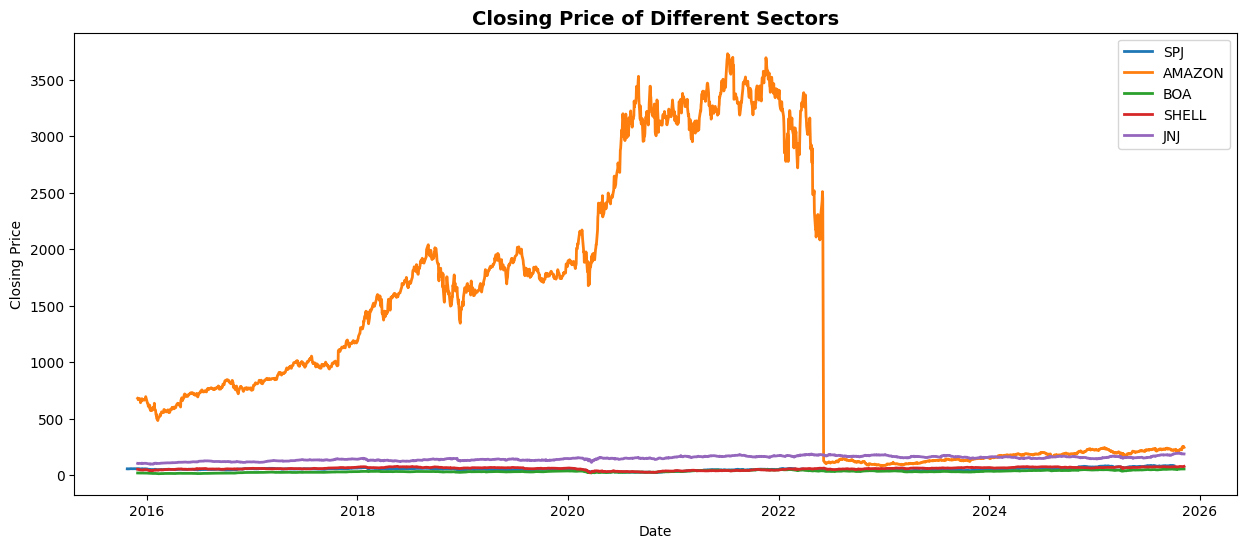

In [ ]:

fig, ax = plt.subplots(figsize=(15,6))

# Line plot on top
ax.plot(df_spj.index, df_spj["close"], color="C0", label="SPJ", linewidth=2)
ax.plot(df_amz .index, df_amz["close"], color="C1", label="AMAZON", linewidth=2)
ax.plot(df_boa.index, df_boa["close"], color="C2", label="BOA", linewidth=2)
ax.plot(df_shel .index, df_shel["close"], color="C3", label="SHELL", linewidth=2)
ax.plot(df_jnj.index, df_jnj["close"], color="C4", label="JNJ", linewidth=2)

# Labels and title
ax.set_title("Closing Price of Different Sectors", fontsize=14, fontweight="bold")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price")

# Legend
ax.legend()

plt.show()


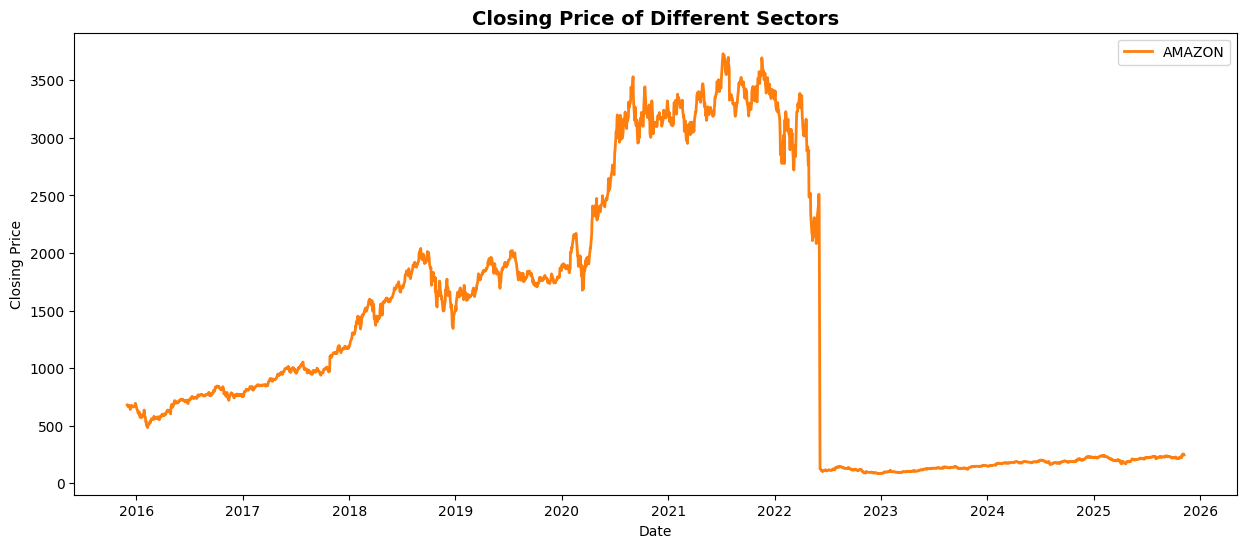

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,6))

# Line plot on top
ax.plot(df_amz .index, df_amz["close"], color="C1", label="AMAZON", linewidth=2)

# Labels and title
ax.set_title("Closing Price of Different Sectors", fontsize=14, fontweight="bold")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price")

# Legend
ax.legend()

plt.show()


#### **Return Calculation**

In [46]:
# Combine all closing prices into one DataFrame
combined = pd.DataFrame({
    "y_boa": df_boa["close"].pct_change()*100,
    "y_amz": df_amz["close"].pct_change()*100,
    "y_shell": df_shel["close"].pct_change()*100,
    "y_jnj": df_jnj["close"].pct_change()*100,
    "y_spj": df_spj["close"].pct_change()*100,
}).dropna()  # Drop rows with missing values (non-overlapping dates)


In [47]:
print(combined.head())
print(combined.describe())


               y_boa     y_amz   y_shell     y_jnj     y_spj
date                                                        
2015-12-01  1.078320  0.451177  1.041875  0.303773  1.143791
2015-12-02  1.849711  1.464916  1.278409  1.250124  1.623616
2015-12-03 -2.808989 -0.949988  1.045725 -2.098106 -2.640560
2015-12-04  1.482326  0.419509  5.062473 -0.358111  0.451101
2015-12-07  2.036067 -1.107289  1.088850  0.878735  1.875000
             y_boa        y_amz      y_shell        y_jnj        y_spj
count  2474.000000  2474.000000  2474.000000  2474.000000  2474.000000
mean     -0.022655     0.698815     0.005303    -0.017910     0.005737
std       1.982759    37.470881     2.035075     1.168496     2.040983
min     -15.107616   -11.922139   -17.697368    -7.405458   -12.690180
25%      -1.014414    -1.117867    -0.908353    -0.589096    -0.971691
50%      -0.045137    -0.107485    -0.079767    -0.034865    -0.019693
75%       0.902461     0.890619     0.839859     0.506816     0.910725
max  

In [ ]:
print(combined.shape)
print()

(2474, 5)

In [22]:
combined = combined.sort_index()
combined.head()


,y_boa,y_amz,y_shell,y_jnj,y_spj
date,,,,,
2015-12-01,1.078320,0.451177,1.041875,0.303773,1.143791
2015-12-02,1.849711,1.464916,1.278409,1.250124,1.623616
2015-12-03,-2.808989,-0.949988,1.045725,-2.098106,-2.640560
2015-12-04,1.482326,0.419509,5.062473,-0.358111,0.451101
2015-12-07,2.036067,-1.107289,1.088850,0.878735,1.875000


### **line plot showing daily return (%) fluctuations over time-volatility comparison**

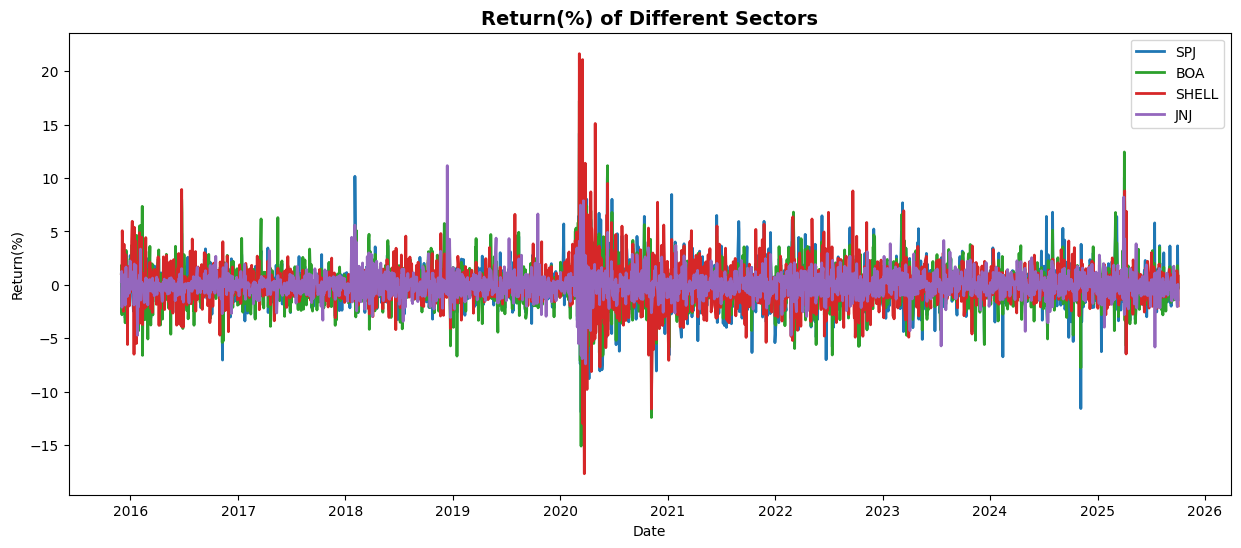

In [ ]:

fig, ax = plt.subplots(figsize=(15,6))

# Line plot on top
ax.plot(combined.index, combined["y_spj"], color="C0", label="SPJ", linewidth=2)
#ax.plot(combined .index, combined["y_amz"], color="C1", label="AMAZON", linewidth=2)
ax.plot(combined.index, combined["y_boa"], color="C2", label="BOA", linewidth=2)
ax.plot(combined .index, combined["y_shell"], color="C3", label="SHELL", linewidth=2)
ax.plot(combined.index, combined["y_jnj"], color="C4", label="JNJ", linewidth=2)

# Labels and title
ax.set_title("Return(%) of Different Sectors", fontsize=14, fontweight="bold")
ax.set_xlabel("Date")
ax.set_ylabel("Return(%)")

# Legend
ax.legend()
ax.grid(alpha=0.3)

plt.show()

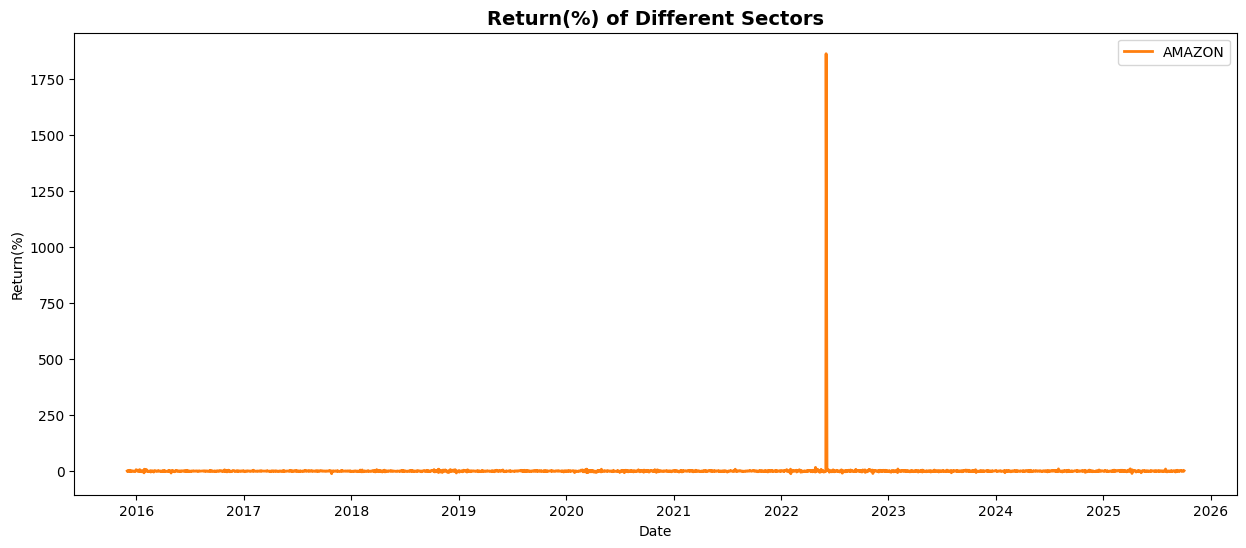

In [43]:
fig, ax = plt.subplots(figsize=(15,6))

# Line plot on top
ax.plot(combined .index, combined["y_amz"], color="C1", label="AMAZON", linewidth=2)

# Labels and title
ax.set_title("Return(%) of Different Sectors", fontsize=14, fontweight="bold")
ax.set_xlabel("Date")
ax.set_ylabel("Return(%)")

# Legend
ax.legend()

plt.show()

In [44]:
mean_returns = combined.mean()
variance_returns = combined.var()

print("Expected Return:\n", mean_returns)
print("\nVariance of expected return:\n", variance_returns)


Expected Return:
 y_boa     -0.022655
y_amz      0.698815
y_shell    0.005303
y_jnj     -0.017910
y_spj      0.005737
dtype: float64

Variance of expected return:
 y_boa         3.931333
y_amz      1404.066945
y_shell       4.141529
y_jnj         1.365383
y_spj         4.165612
dtype: float64


In [45]:
print(df_amz.head(10))   # first 10 rows
print(df_amz.tail(10))   # last 10 rows


               open     high     low   close       volume
date                                                     
2025-11-07  242.900  244.900  238.49  244.41   46374294.0
2025-11-06  249.155  250.380  242.17  243.04   46004203.0
2025-11-05  249.030  251.000  246.16  250.20   39234469.0
2025-11-04  250.380  257.010  248.66  249.32   51546311.0
2025-11-03  255.360  258.600  252.90  254.00   95997816.0
2025-10-31  250.100  250.500  243.98  244.22  166340808.0
2025-10-30  227.060  228.440  222.75  222.86  102252937.0
2025-10-29  231.672  232.820  227.76  230.30   52036151.0
2025-10-28  228.215  231.485  226.21  229.25   47100026.0
2025-10-27  227.660  228.400  225.54  226.97   38266995.0
              open     high     low   close     volume
date                                                  
2015-12-14  641.75  658.585  635.27  657.91  4361273.0
2015-12-11  651.23  657.880  639.62  640.15  5474420.0
2015-12-10  665.59  668.526  659.56  662.32  3455472.0
2015-12-09  678.00  679.000  

In [26]:
cov_matrix = combined.cov()
print("\nCovariance Matrix:\n", cov_matrix)



Covariance Matrix:
             y_boa        y_amz   y_shell     y_jnj     y_spj
y_boa    3.931333     1.445885  2.072556  0.758591  3.377591
y_amz    1.445885  1404.066945  0.269241  0.436378  0.706622
y_shell  2.072556     0.269241  4.141529  0.561823  1.999779
y_jnj    0.758591     0.436378  0.561823  1.365383  0.733531
y_spj    3.377591     0.706622  1.999779  0.733531  4.165612


In [27]:
corr_matrix = combined.corr()
print("\nCorrelation Matrix:\n", corr_matrix)



Correlation Matrix:
             y_boa     y_amz   y_shell     y_jnj     y_spj
y_boa    1.000000  0.019461  0.513637  0.327424  0.834637
y_amz    0.019461  1.000000  0.003531  0.009966  0.009240
y_shell  0.513637  0.003531  1.000000  0.236261  0.481462
y_jnj    0.327424  0.009966  0.236261  1.000000  0.307576
y_spj    0.834637  0.009240  0.481462  0.307576  1.000000


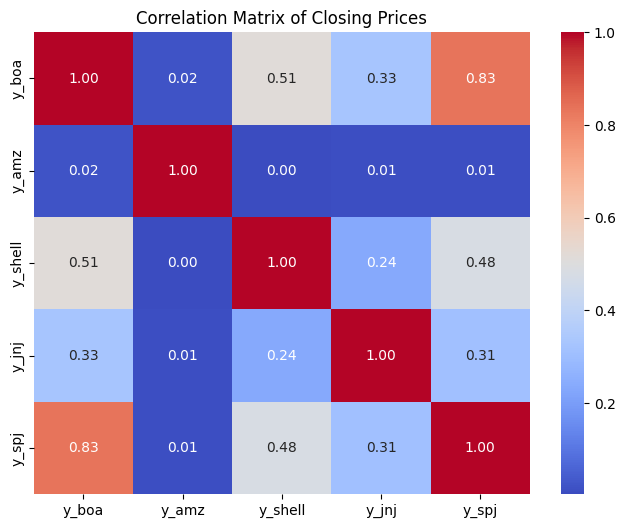

In [28]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Closing Prices")
plt.show()


##### **Sharpe Ratio Calculation**

In [29]:
# Convert percentages to decimals
returns = combined / 100  

# Define the daily risk-free rate (e.g., 5% annual → 0.05/252 daily)
risk_free_rate = 0.05 / 252

# Calculate mean (expected) return and standard deviation (risk)
mean_returns = returns.mean()
std_returns = returns.std()

# Calculate Sharpe Ratio
sharpe_ratio = (mean_returns - risk_free_rate) / std_returns

# Display neatly
sharpe_df = pd.DataFrame({
    "Expected Daily Return": mean_returns * 100,
    "Volatility (Std Dev)": std_returns * 100,
    "Sharpe Ratio": sharpe_ratio
}).round(4)

print("📊 Sharpe Ratio Analysis\n")
print(sharpe_df)


📊 Sharpe Ratio Analysis

         Expected Daily Return  Volatility (Std Dev)  Sharpe Ratio
y_boa                  -0.0227                1.9828       -0.0214
y_amz                   0.6988               37.4709        0.0181
y_shell                 0.0053                2.0351       -0.0071
y_jnj                  -0.0179                1.1685       -0.0323
y_spj                   0.0057                2.0410       -0.0069


##### **Portfolio Sharpe Ratio & Efficient Frontier**

📊 Optimal Portfolio:
Return          0.005714
Volatility      0.306710
Sharpe Ratio    0.017984
Name: 4821, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_25488\1121283252.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(optimal_portfolio[1], optimal_portfolio[0],


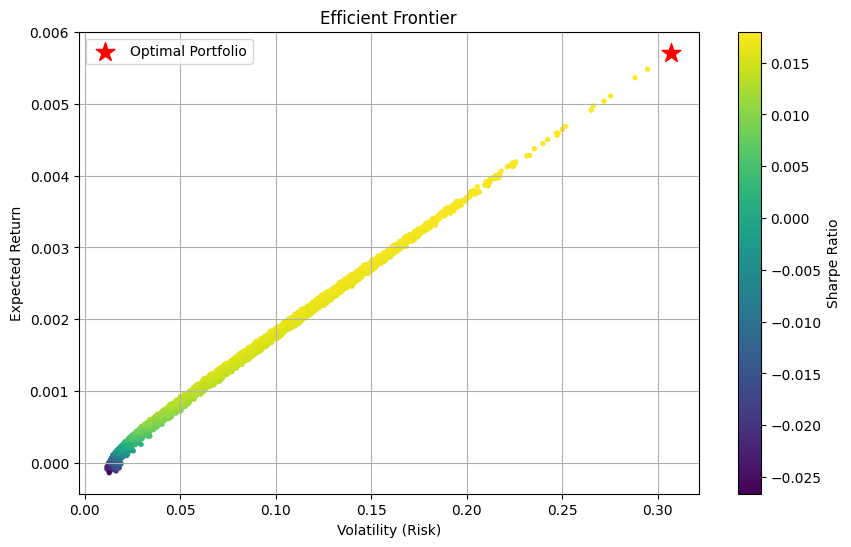

In [30]:
# --- 1. Prepare Returns ---
returns = combined / 100  # convert % to decimal
mean_returns = returns.mean()
cov_matrix = returns.cov()
risk_free_rate = 0.05 / 252  # daily risk-free rate

# --- 2. Portfolio Simulation ---
num_portfolios = 10000
results = np.zeros((3, num_portfolios))  # [return, risk, sharpe]

for i in range(num_portfolios):
    weights = np.random.random(len(returns.columns))
    weights /= np.sum(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (portfolio_return - risk_free_rate) / portfolio_volatility

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe

# --- 3. Create Results DataFrame ---
results_df = pd.DataFrame({
    'Return': results[0],
    'Volatility': results[1],
    'Sharpe Ratio': results[2]
})

# --- 4. Identify Optimal Portfolio ---
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
optimal_portfolio = results_df.loc[max_sharpe_idx]

print("📊 Optimal Portfolio:")
print(optimal_portfolio)

# --- 5. Plot Efficient Frontier ---
plt.figure(figsize=(10,6))
plt.scatter(results_df['Volatility'], results_df['Return'], 
            c=results_df['Sharpe Ratio'], cmap='viridis', s=8)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_portfolio[1], optimal_portfolio[0], 
            color='red', marker='*', s=200, label='Optimal Portfolio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show();


##### **Portfolio Weight Optimization**

In [31]:
# --- 1. Prepare Data ---
returns = combined / 100  # convert % to decimal
mean_returns = returns.mean()
cov_matrix = returns.cov()
risk_free_rate = 0.05 / 252

# --- 2. Portfolio Simulation ---
num_portfolios = 10000
results = np.zeros((4, num_portfolios))  # [return, risk, sharpe, index]
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(returns.columns))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (portfolio_return - risk_free_rate) / portfolio_volatility

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe
    results[3, i] = i

# --- 3. Convert to DataFrame ---
results_df = pd.DataFrame({
    'Return': results[0],
    'Volatility': results[1],
    'Sharpe Ratio': results[2]
})

# --- 4. Identify Optimal Portfolio ---
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
optimal_weights = weights_record[int(results[3, max_sharpe_idx])]

# --- 5. Display Optimal Portfolio Weights ---
assets = ['Bank of America', 'Amazon', 'Shell', 'Johnson & Johnson', 'S&P 500 Index']
weights_df = pd.DataFrame({
    'Asset': assets,
    'Optimal Weight (%)': np.round(optimal_weights * 100, 2)
})

print("📊 Optimal Portfolio Weights:")
print(weights_df)


📊 Optimal Portfolio Weights:
               Asset  Optimal Weight (%)
0    Bank of America                3.61
1             Amazon               63.62
2              Shell                6.26
3  Johnson & Johnson                0.55
4      S&P 500 Index               25.96


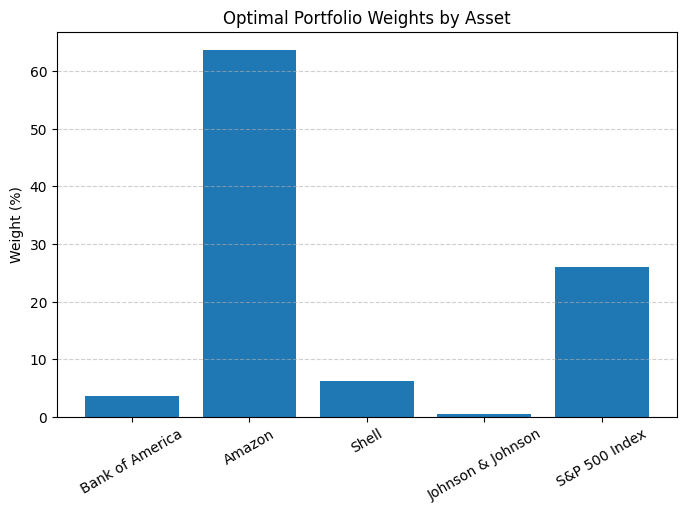

In [32]:
# --- Bar Chart ---
plt.figure(figsize=(8, 5))
plt.bar(weights_df['Asset'], weights_df['Optimal Weight (%)'])
plt.title('Optimal Portfolio Weights by Asset')
plt.ylabel('Weight (%)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


##### **Portfolio Return, Volatility, Sharpe Ratio**

In [33]:
# Portfolio performance using optimal weights
weights = np.array([0.0189, 0.7441, 0.1727, 0.0270, 0.0373])

# Expected portfolio return
portfolio_return = np.dot(weights, sharpe_df["Expected Daily Return"])

# Portfolio volatility (risk)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Sharpe Ratio
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print("Expected Daily Return:", round(portfolio_return, 6))
print("Volatility:", round(portfolio_volatility, 6))
print("Sharpe Ratio:", round(sharpe_ratio, 6))


Expected Daily Return: 0.520193
Volatility: 0.278884
Sharpe Ratio: 1.864557


#### STD


#### **PCA and ACF**

<Figure size 1000x500 with 0 Axes>

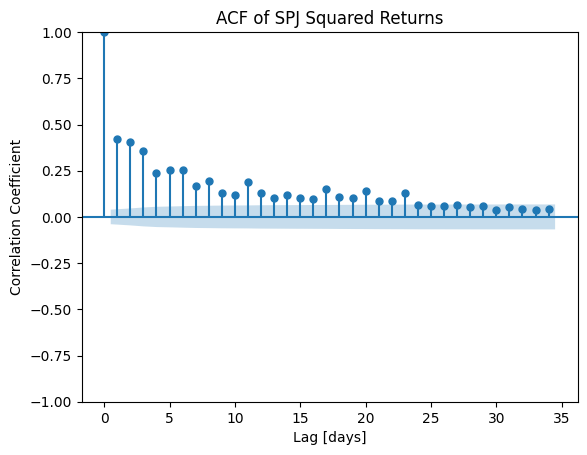

In [34]:
# Squared returns
squared_returns =combined["y_spj"]  ** 2

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(squared_returns)
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient")
plt.title("ACF of SPJ Squared Returns")
plt.show()


<Figure size 1000x500 with 0 Axes>

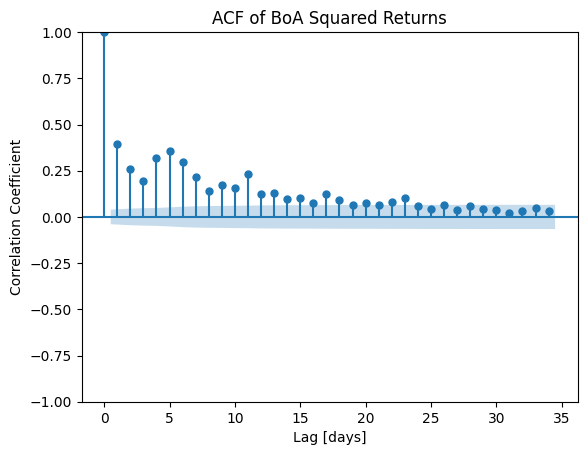

In [35]:
# Squared returns
squared_returns =combined["y_boa"]  ** 2

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(squared_returns)
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient")
plt.title("ACF of BoA Squared Returns")
plt.show();


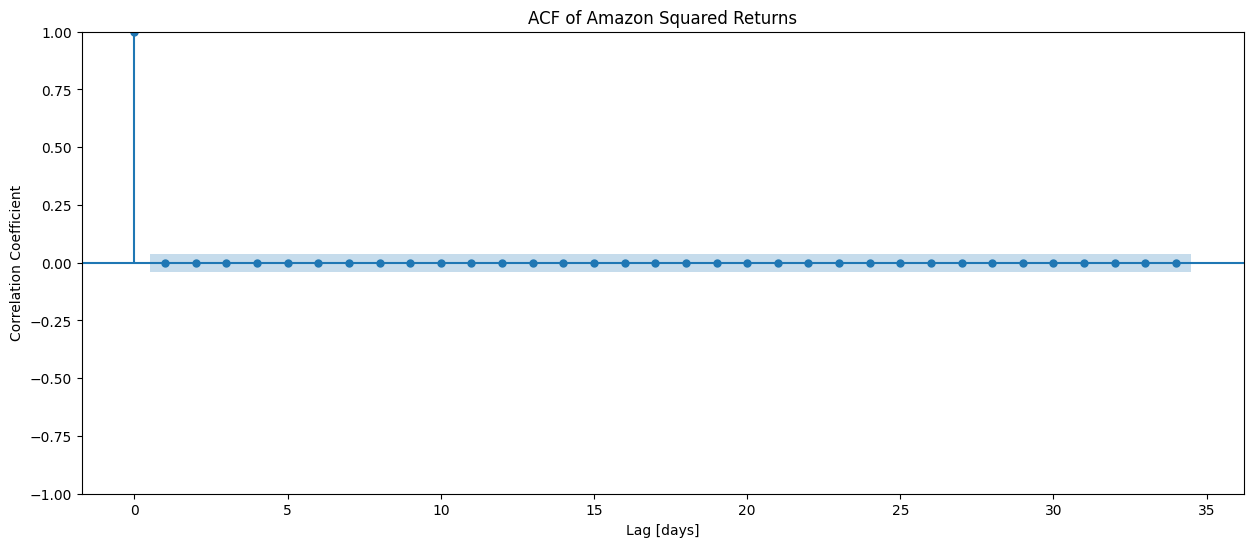

In [36]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot ACF of squared returns
plot_acf(combined["y_amz"] ** 2, ax=ax)

# Add axis labels
ax.set_xlabel("Lag [days]")
ax.set_ylabel("Correlation Coefficient")

# Add title
ax.set_title("ACF of Amazon Squared Returns")

plt.show()


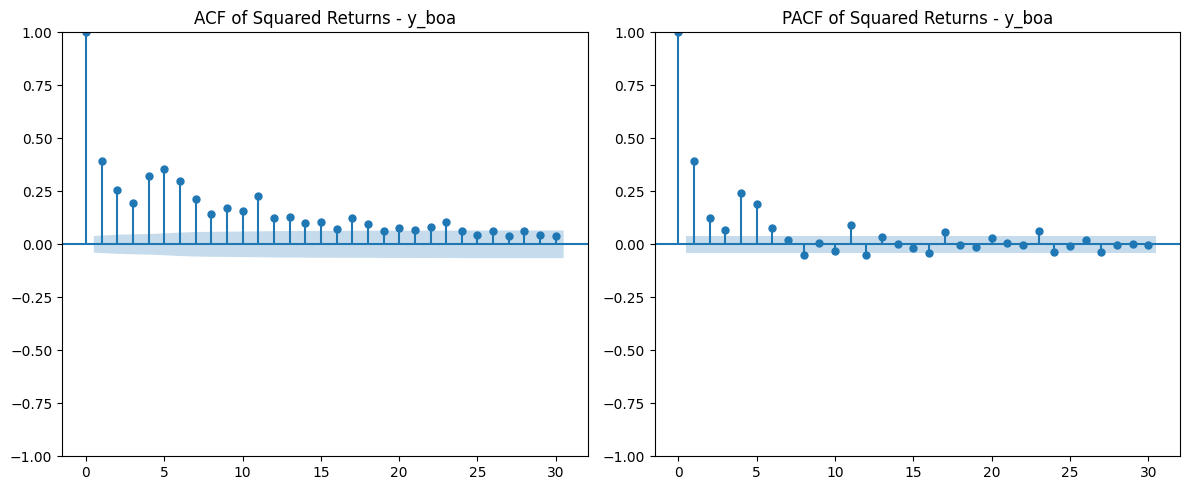

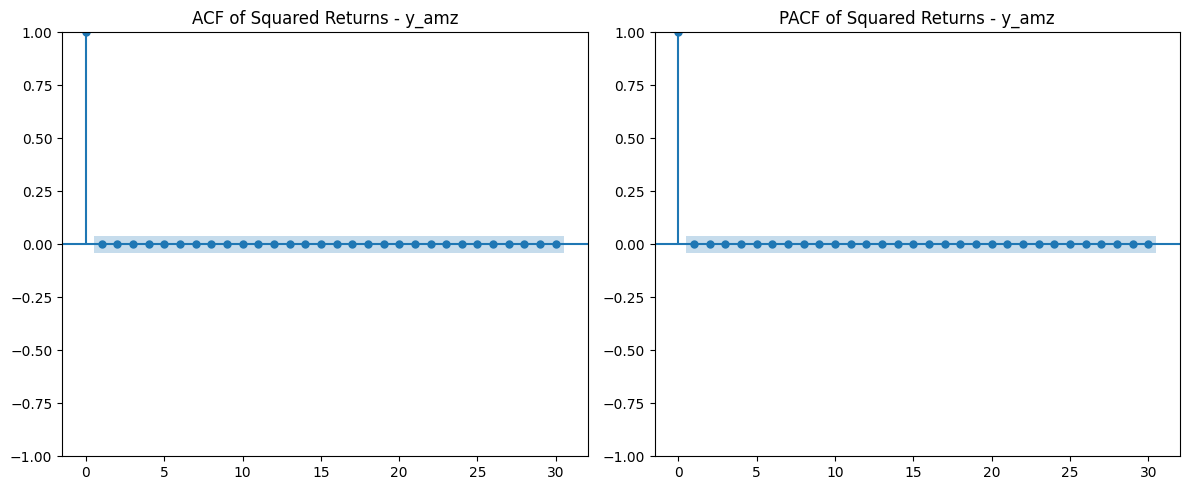

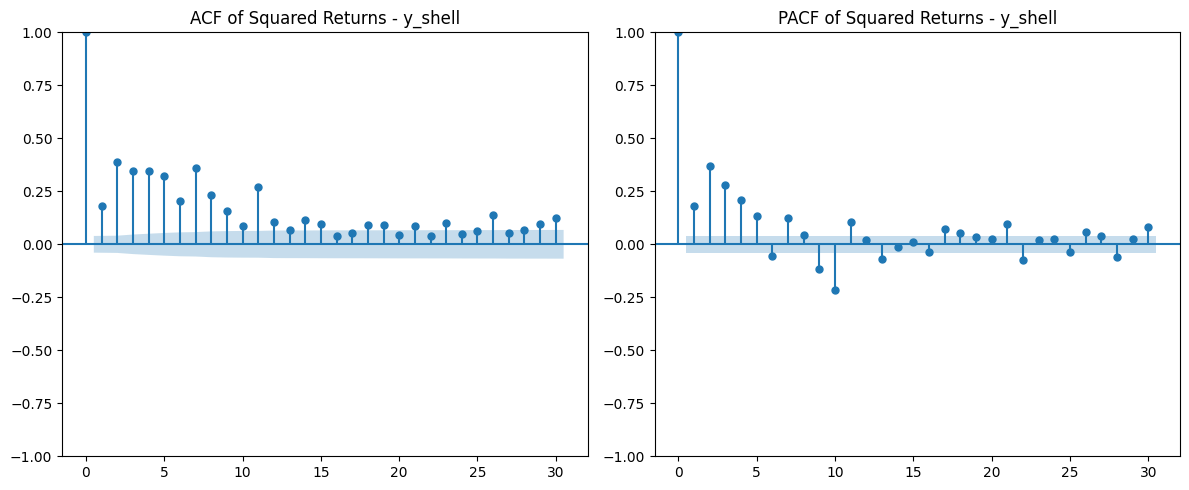

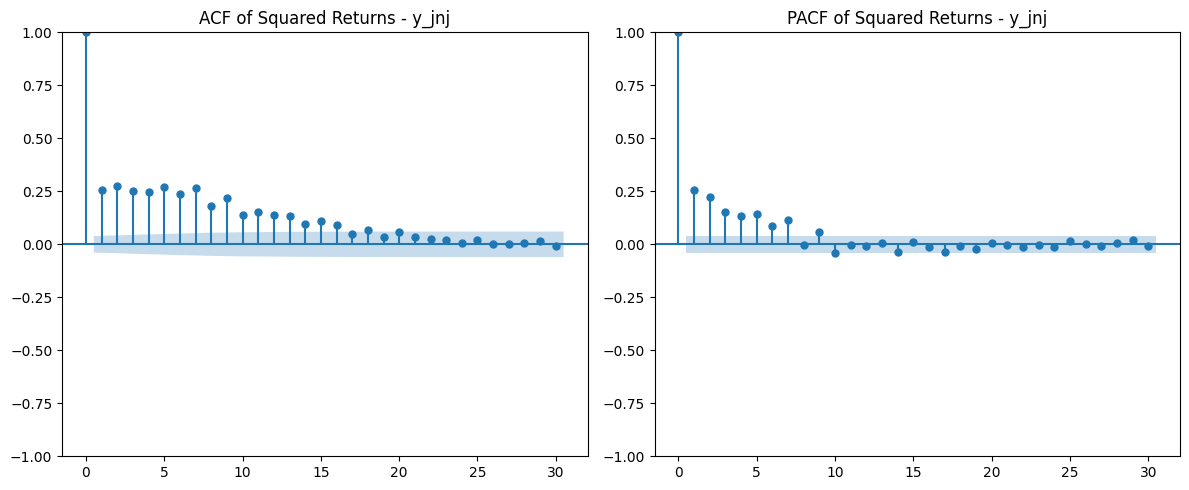

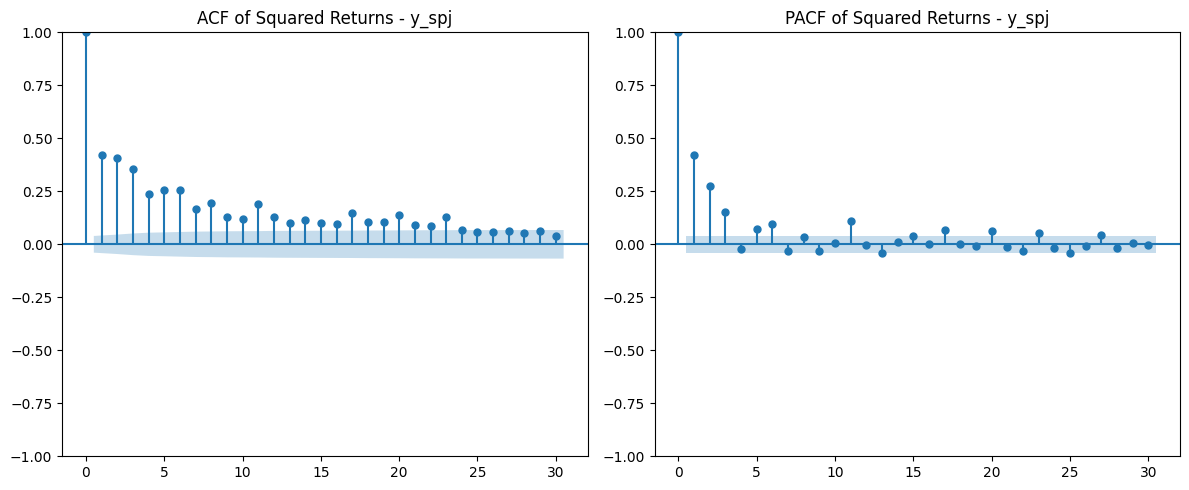

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you already have this combined DataFrame
# combined = pd.DataFrame({
#     "y_boa": df_boa["close"].pct_change()*100,
#     "y_amz": df_amz["close"].pct_change()*100,
#     "y_shell": df_shel["close"].pct_change()*100,
#     "y_jnj": df_jnj["close"].pct_change()*100,
#     "y_spj": df_spj["close"].pct_change()*100
# }).dropna()

# Function to plot ACF and PACF for each series
def plot_acf_pacf(data, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plot_acf(data**2, lags=30, ax=plt.gca(), title=f"ACF of Squared Returns - {title}")
    
    plt.subplot(1,2,2)
    plot_pacf(data**2, lags=30, ax=plt.gca(), title=f"PACF of Squared Returns - {title}")
    
    plt.tight_layout()
    plt.show()

# Loop through each column and plot
for col in combined.columns:
    plot_acf_pacf(combined[col].dropna(), col)


In [38]:
from arch import arch_model
import pandas as pd

# Assuming 'combined' DataFrame already exists with columns:
# ['y_boa', 'y_amz', 'y_shell', 'y_jnj', 'y_spj']

def select_best_garch(series, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    for p in range(1, max_p+1):
        for q in range(1, max_q+1):
            try:
                model = arch_model(series, vol='Garch', p=p, q=q, dist='normal')
                fitted = model.fit(disp='off')
                if fitted.aic < best_aic:
                    best_aic = fitted.aic
                    best_order = (p, q)
                    best_model = fitted
            except Exception:
                continue
                
    return best_order, best_aic, best_model


In [39]:
results = {}

for col in combined.columns:
    order, aic, model = select_best_garch(combined[col].dropna(), max_p=3, max_q=3)
    results[col] = {
        'Best (p,q)': order,
        'AIC': aic,
        'Model Summary': model.summary()
    }

# Display optimal orders
for asset, info in results.items():
    print(f"\nAsset: {asset}")
    print(f"Best GARCH order: {info['Best (p,q)']}")
    print(f"AIC: {info['AIC']:.4f}")



Asset: y_boa
Best GARCH order: (2, 3)
AIC: 9756.2369

Asset: y_amz
Best GARCH order: (1, 1)
AIC: 24956.0654

Asset: y_shell
Best GARCH order: (1, 3)
AIC: 9307.0109

Asset: y_jnj
Best GARCH order: (1, 2)
AIC: 7342.6596

Asset: y_spj
Best GARCH order: (1, 3)
AIC: 9830.2854


#### **GARCH Model**

In [40]:
# Example usage
model_shop = GarchModel(ticker="MTNOY", repo=repo, use_new_data=False)
model_shop.wrangle_data(n_observations=1000)
model_shop.fit(p=1, q=1)

print("AIC:", model_shop.aic)
print("BIC:", model_shop.bic)


NameError: name 'GarchModel' is not defined

##### **ACF plot of the squared standardized residuals**

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming you already have a fitted model, e.g. model_shop
# Standardized residuals
std_resid = model_shop.model.std_resid

# Squared standardized residuals
squared_std_resid = std_resid ** 2

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(squared_std_resid, lags=40, zero=False)
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient")
plt.title("ACF of MTNOY GARCH Model Standardized Residuals")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Squared standardized residuals
squared_std_resid = std_resid ** 2

# Plot
plt.figure(figsize=(15, 6))
plt.plot(squared_std_resid, label="Squared Standardized Residuals")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Squared Standardized Residuals of MTNOY GARCH Model")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Get standardized residuals from the fitted model
std_resid = model1.model.std_resid

# Plot standardized residuals
std_resid.plot(ax=ax, label="Standardized Residuals", linewidth=3)

# Add axis labels
ax.set_xlabel("Date")
ax.set_ylabel("Value")

# Add title
ax.set_title("MTNOY GARCH Model Standardized Residuals")

# Add legend
ax.legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot ACF of squared standardized residuals
plot_acf(model.std_resid**2, ax=ax, lags=40, zero=False)

# Add axis labels
ax.set_xlabel("Lag [days]")
ax.set_ylabel("Correlation Coefficient")

# Add title
ax.set_title("ACF of MTNOY GARCH Model Standardized Residuals")

plt.show()


In [ ]:
# Import your model
from model import GarchModel
from data import SQLRepository
from config import settings


# Define assets and their optimal (p, q) orders
assets = {
    "y_boa":   (1, 1),
    "y_amz":   (1, 1),
    "y_shell": (1, 2),
    "y_jnj":   (3, 2),
    "y_spj":   (2, 2)
}
ticker=["BAC","AMZ","SHEL",""]

# Loop through each asset
for ticker, (p, q) in assets.items():
    print(f"\n🔹 Asset: {ticker}")

    # Initialize and wrangle data
    model = GarchModel(ticker=ticker, repo=repo, use_new_data=False)
    model.wrangle_data(n_observations=1000)

    # Fit model
    model.fit(p=p, q=q)

    # Display model metrics
    print(f"Best GARCH order: ({p}, {q})")
    print(f"AIC: {model.aic:.4f}")
    print(f"BIC: {model.bic:.4f}")

    # Save trained model
    path = model.dump()
    print(f"Model saved at: {path}")
